<h2>1. IMPORTING LIBRARIES</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<h2>2. REMOVING MISSING DATA</h2>

In [2]:
adult=pd.read_csv('../input/adult-census-income/adult.csv', na_values=["?"])  #na_values: ? -> NaN
print(adult.head())

   age workclass  fnlwgt     education  education.num marital.status  \
0   90       NaN   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66       NaN  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                NaN  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                NaN      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

In [3]:
adult_new=adult.dropna(axis=0)
print(adult_new.head())

print('Dimensions:',adult.shape)
print('Dimensions:',adult_new.shape) #after removing the ? rows 

   age workclass  fnlwgt     education  education.num marital.status  \
1   82   Private  132870       HS-grad              9        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   
5   34   Private  216864       HS-grad              9       Divorced   
6   38   Private  150601          10th              6      Separated   

          occupation   relationship   race     sex  capital.gain  \
1    Exec-managerial  Not-in-family  White  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   
5      Other-service      Unmarried  White  Female             0   
6       Adm-clerical      Unmarried  White    Male             0   

   capital.loss  hours.per.week native.country income  
1          4356              18  United-States  <=50K  
3          3900              40  United-States

In [4]:
#before removing NaN
col=adult.columns
data_type=adult.dtypes
uniq=adult.nunique()

print("\n%30s  %10s   %10s " % ("Column Name", "Data Type", "Unique Values"))
for i in range(len(adult.columns)):
    print("%30s  %10s   %10s " % (col[i],data_type[i],uniq[i]))

print("\nDimensions:",adult.shape[0],'rows and ',adult.shape[1],'columns')


                   Column Name   Data Type   Unique Values 
                           age       int64           73 
                     workclass      object            8 
                        fnlwgt       int64        21648 
                     education      object           16 
                 education.num       int64           16 
                marital.status      object            7 
                    occupation      object           14 
                  relationship      object            6 
                          race      object            5 
                           sex      object            2 
                  capital.gain       int64          119 
                  capital.loss       int64           92 
                hours.per.week       int64           94 
                native.country      object           41 
                        income      object            2 

Dimensions: 32561 rows and  15 columns


In [5]:
#after removing NaN
col=adult_new.columns
data_type=adult_new.dtypes
uniq=adult_new.nunique()

print("\n%30s  %10s   %10s " % ("Column Name", "Data Type", "Unique Values"))
for i in range(len(adult_new.columns)):
    print("%30s  %10s   %10s " % (col[i],data_type[i],uniq[i]))

print("\nDimensions:",adult_new.shape[0],'rows and ',adult_new.shape[1],'columns')



                   Column Name   Data Type   Unique Values 
                           age       int64           72 
                     workclass      object            7 
                        fnlwgt       int64        20263 
                     education      object           16 
                 education.num       int64           16 
                marital.status      object            7 
                    occupation      object           14 
                  relationship      object            6 
                          race      object            5 
                           sex      object            2 
                  capital.gain       int64          118 
                  capital.loss       int64           90 
                hours.per.week       int64           94 
                native.country      object           41 
                        income      object            2 

Dimensions: 30162 rows and  15 columns


<h2>3. User context analysis and visualization  </h2>

-- story1: workclass, age -> income  
-- story2: sex, education_num -> income  
-- story3: hours-per-week, marital.status, race -> income  
-- story4: capital.gain+capital.loss, age -> income  
-- story5: occupation, hours per week -> income

<Axes: title={'center': 'Income'}, ylabel='income'>

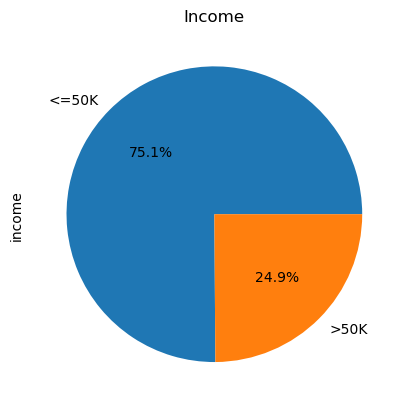

In [6]:
adult_new["income"].value_counts().plot.pie(title='Income', autopct='%1.1f%%')


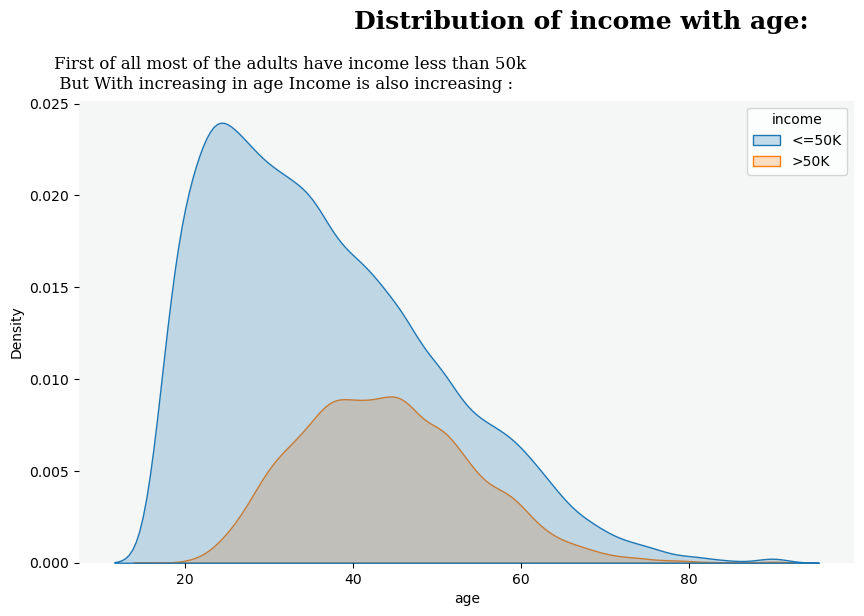

In [7]:
# story 1
fig=plt.figure(figsize=(10,6))
ax=sns.kdeplot(x=adult_new["age"],hue=adult_new["income"],fill=True)
ax.set_facecolor('#f5f6f6')
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)
 
fig.text(0.4,1,"Distribution of income with age:",**{'font':'serif', 'size':18,'weight':'bold'}, alpha = 1)
fig.text(0.1,0.90,"First of all most of the adults have income less than 50k \n But With increasing in age Income is also increasing :",**{'font':'serif', 'size':12,}, alpha = 1)


fig.show()

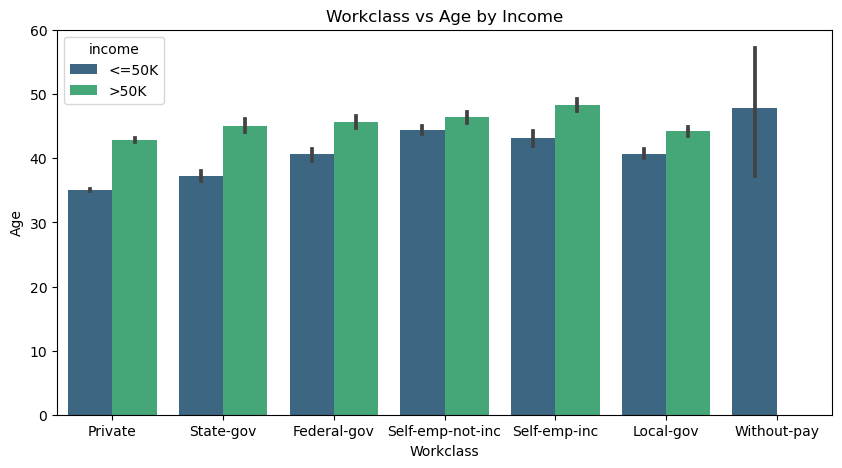

In [8]:
#user story 1: age, workclass -> income
plt.figure(figsize= (10,5))
sns.barplot(x="workclass",y="age", hue="income", data=adult_new, palette = "viridis")
plt.xlabel("Workclass")
plt.ylabel("Age")
plt.title("Workclass vs Age by Income")
plt.show()

<Axes: title={'center': 'workclass'}, ylabel='workclass'>

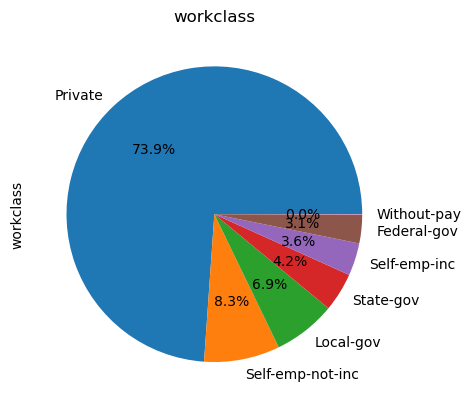

In [9]:
adult_new["workclass"].value_counts().plot.pie(title='workclass', autopct='%1.1f%%')


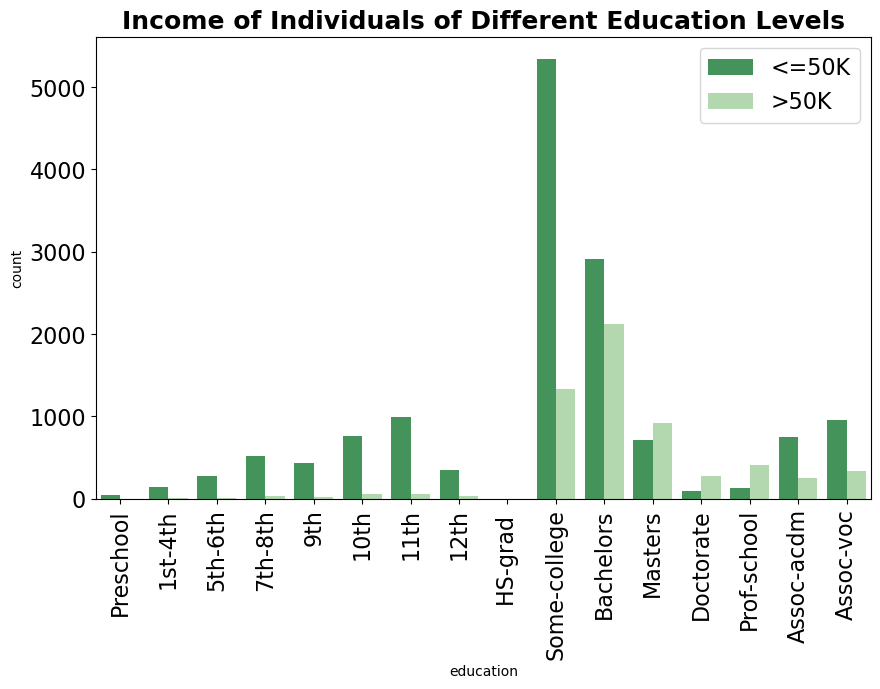

In [10]:
# story 2
plt.figure(figsize=(10,6))
order_list = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 
                'HS-grad ', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school', 
              'Assoc-acdm', 'Assoc-voc']
sns.countplot(x=adult_new['education'], hue = adult_new['income'], palette='Greens_r', order= order_list)
plt.title('Income of Individuals of Different Education Levels', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

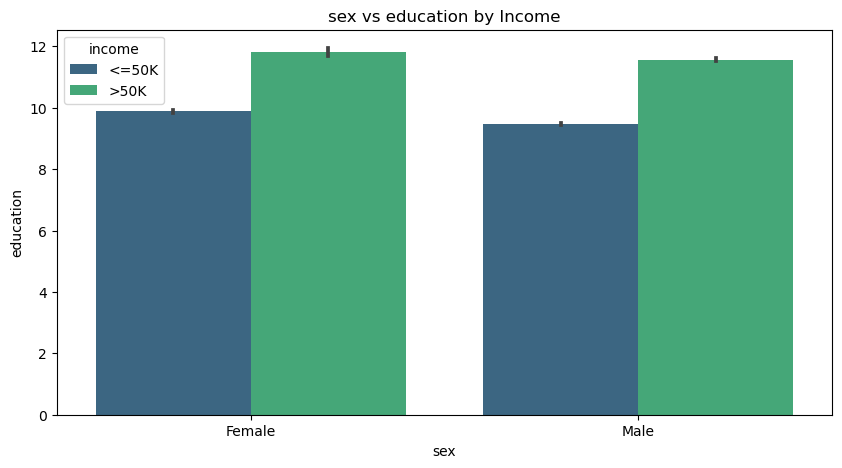

In [11]:
# story 2: education, sex -> income
plt.figure(figsize= (10,5))
sns.barplot(x="sex",y="education.num", hue="income", data=adult_new, palette = "viridis")
plt.xlabel("sex")
plt.ylabel("education")
plt.title("sex vs education by Income")
plt.show()




<Axes: title={'center': 'Marital status'}, ylabel='marital.status'>

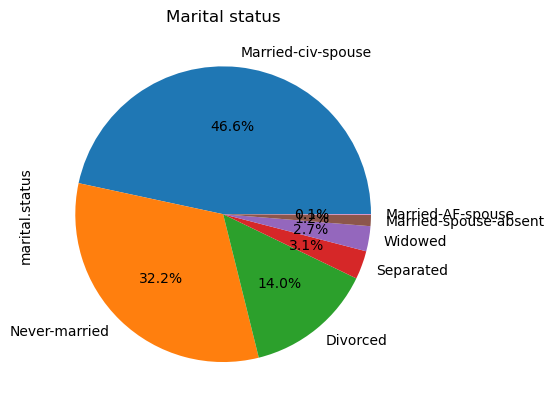

In [12]:
adult_new["marital.status"].value_counts().plot.pie(title='Marital status', autopct='%1.1f%%')


<Axes: title={'center': 'Race'}, ylabel='race'>

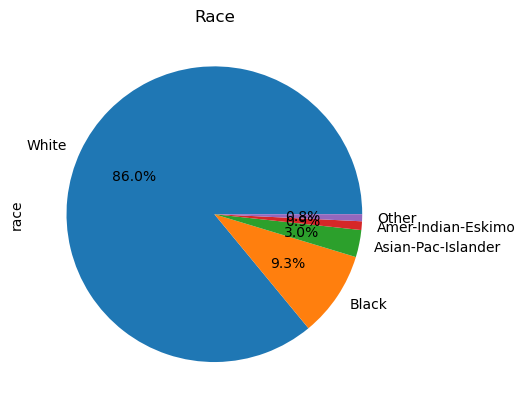

In [13]:
adult_new["race"].value_counts().plot.pie(title='Race', autopct='%1.1f%%')


In [14]:
adult_new_story3=adult_new.copy()

adult_new_story3.drop(['workclass','fnlwgt','education','education.num','sex','age',
                       'occupation','relationship','capital.gain','capital.loss'  , 'native.country'], axis=1, inplace=True)

adult_new_story3['income'].replace({'<=50K':0,'>50K':1},inplace=True)
adult_new_story3['race'].replace({'White':0,'Black':1,'Asian-Pac-Islander':2,'Amer-Indian-Eskimo':3,'Other':4},inplace=True)
adult_new_story3['marital.status'].replace({'Married-civ-spouse':0,'Divorced':1,'Never-married':2,'Separated':3,'Widowed':4,'Married-spouse-absent':5,'Married-AF-spouse':6},inplace=True)


print(adult_new_story3)

import plotly.express as px
fig = px.parallel_coordinates(adult_new_story3, color="income",
                              dimensions=['hours.per.week','marital.status','race','income'],
                              color_continuous_scale=px.colors.diverging.Tealrose
                              )

#resize 
fig.update_layout(
    font=dict(
        family="Arial Black",
        size=20,  # Set the font size here
        color="Black"
    )
)
fig.show()

       marital.status  race  hours.per.week  income
1                   4     0              18       0
3                   1     0              40       0
4                   3     0              40       0
5                   1     0              45       0
6                   3     0              40       0
...               ...   ...             ...     ...
32556               2     0              40       0
32557               0     0              38       0
32558               0     0              40       1
32559               4     0              40       0
32560               2     0              20       0

[30162 rows x 4 columns]


(<Figure size 640x480 with 3 Axes>,
 {('Female', '<=50K'): (0.0, 0.0, 0.32270185443051963, 0.883377224830202),
  ('Female', '>50K'): (0.0,
   0.8866994839664146,
   0.32270185443051963,
   0.1133005160335853),
  ('Male', '<=50K'): (0.3276769788086291,
   0.0,
   0.672323021191371,
   0.6838832938292052),
  ('Male', '>50K'): (0.3276769788086291,
   0.6872055529654179,
   0.672323021191371,
   0.3127944470345821)})

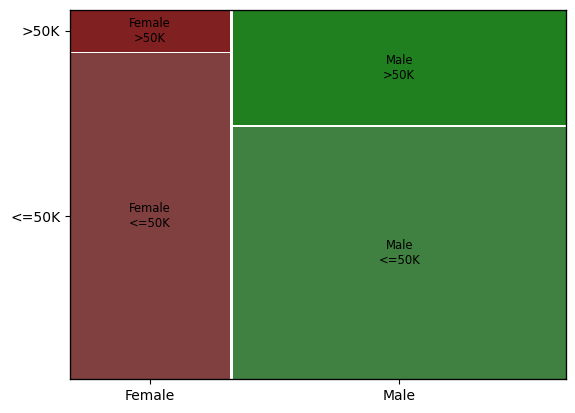

In [25]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(adult_new, ['sex', 'income'])


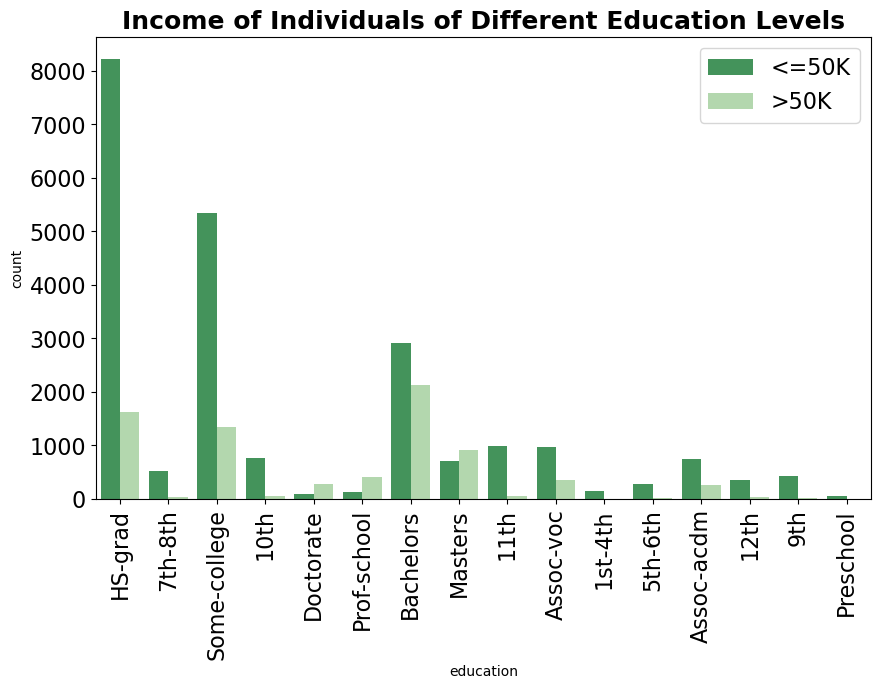

In [15]:

plt.figure(figsize=(10,6))

sns.countplot(x=adult_new['education'], hue = adult_new['income'], palette='Greens_r')
plt.title('Income of Individuals of Different Education Levels', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

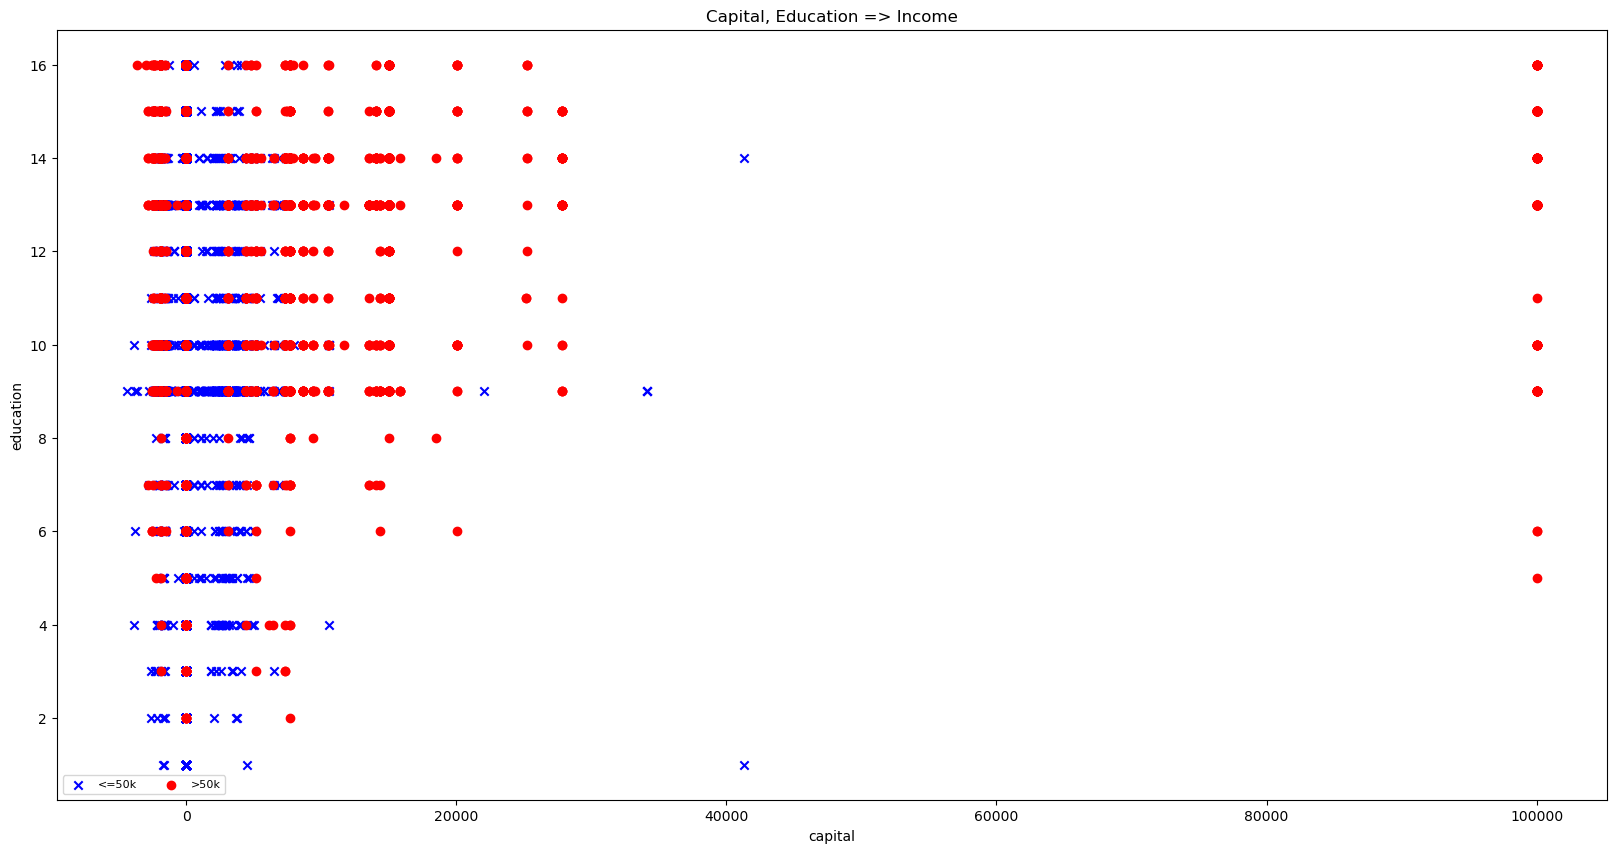

In [16]:
# story 4
# lo = plt.scatter(random(10), random(10), marker='x', color=colors[0])

adult_new['capital_sum']=adult_new['capital.gain']-adult_new['capital.loss']

less50k=adult_new[adult_new['income']=='<=50K']
greater50k=adult_new[adult_new['income']=='>50K']


plt.figure(figsize= (20,10))


x=plt.scatter(less50k['capital_sum'],less50k['education.num'] ,marker='x' ,c ="blue")
o=plt.scatter(greater50k['capital_sum'],greater50k['education.num'] ,marker='o' ,c ="red")

plt.xlabel("capital")
plt.ylabel("education")
plt.title('Capital, Education => Income')


plt.legend((x, o),
           ('<=50k', '>50k'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)

plt.show()



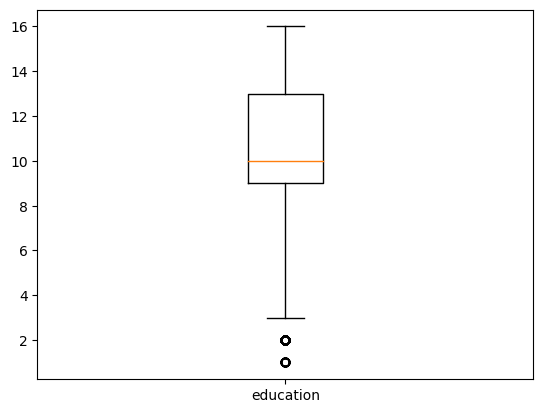

In [17]:


plt.boxplot(adult_new['education.num'],labels=('education',))
 
# show plot
plt.show()


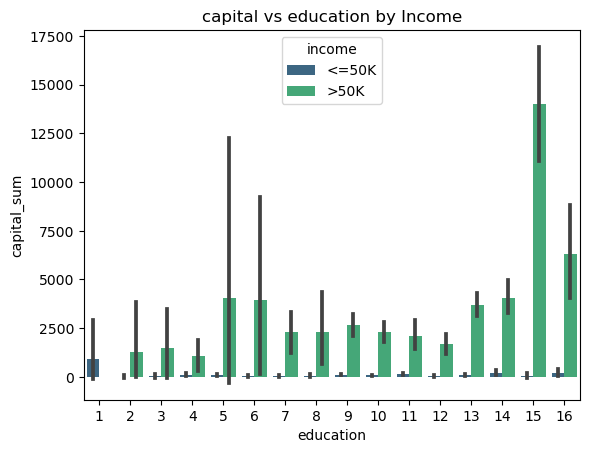

In [18]:
avgHours=adult_new['hours.per.week'].mean()
# sns.set_theme(font_scale=2.5)
sns.barplot(y="capital_sum",x="education.num", hue="income", data=adult_new, palette = "viridis")
 
    
plt.ylabel("capital_sum")
plt.xlabel("education")
plt.title("capital vs education by Income")
plt.show()

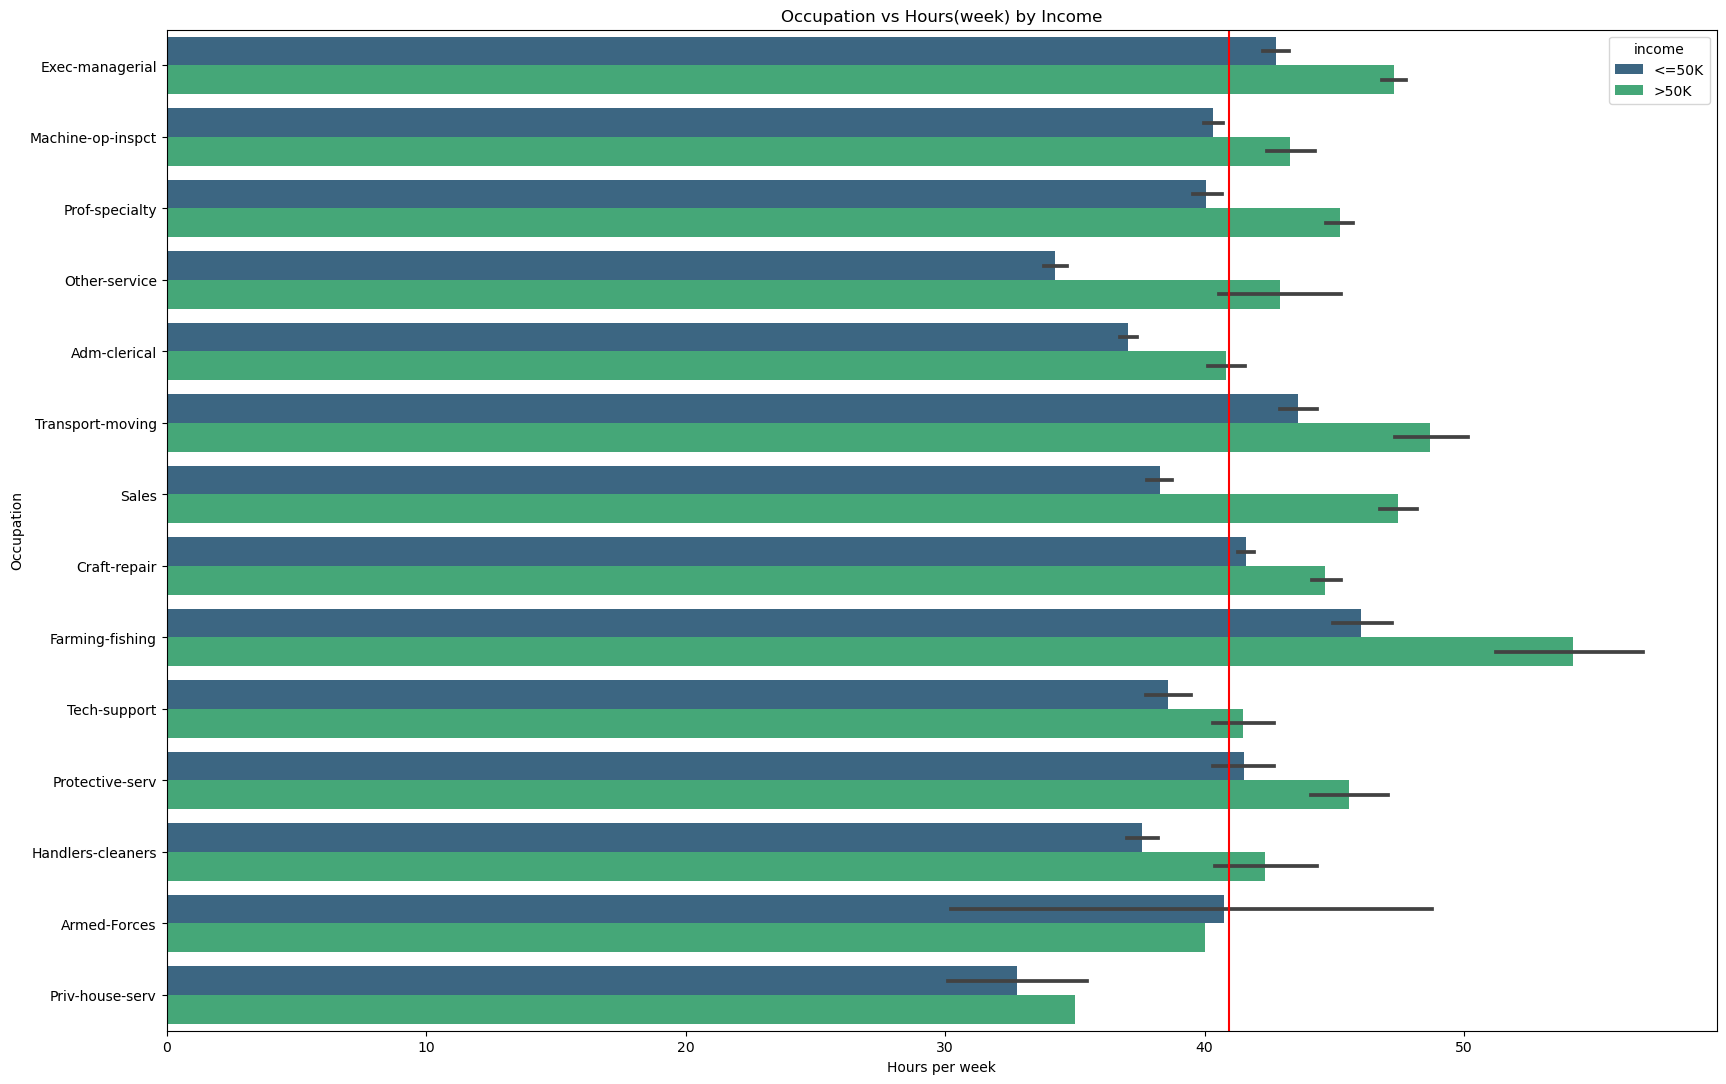

In [19]:
# story 5
avgHours=adult_new['hours.per.week'].mean()
# sns.set_theme(font_scale=2.5)
plt.figure(figsize= (20,13))
sns.barplot(x="hours.per.week",y="occupation", hue="income", data=adult_new, palette = "viridis")
plt.axvline(avgHours, color='r') # vertical

plt.ylabel("Occupation")
plt.xlabel("Hours per week")
plt.title("Occupation vs Hours(week) by Income")
plt.show()